## Overfitting in deep decision trees

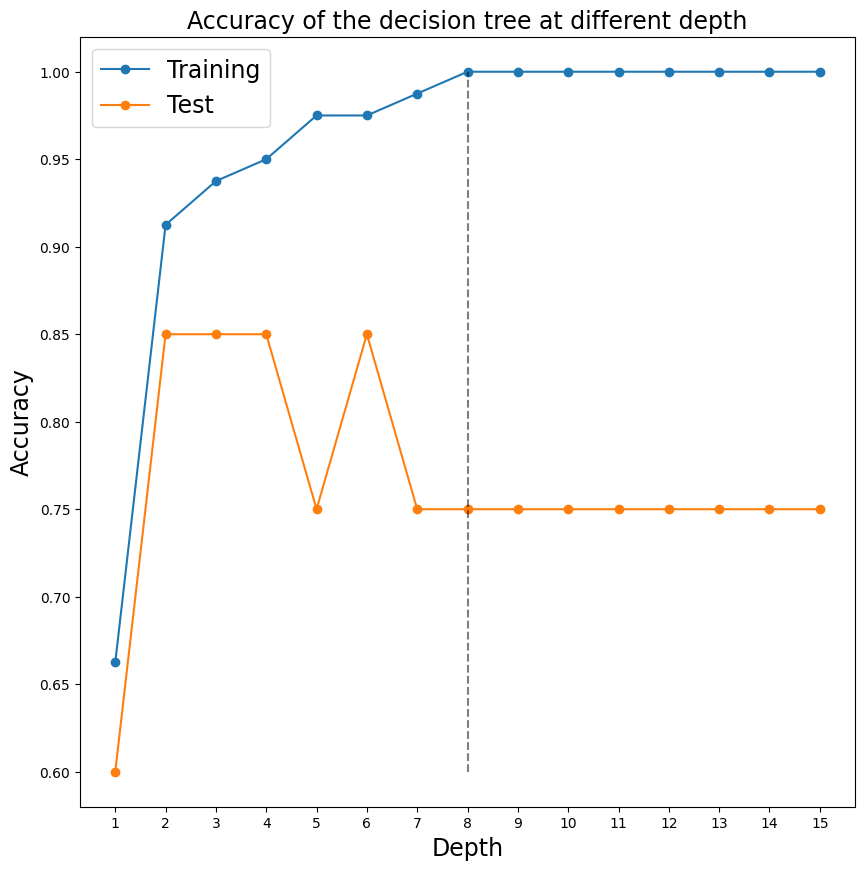

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples = 100, n_features = 2, n_informative = 2,
                            n_redundant = 0, n_classes = 3, random_state = 10,
                           flip_y = 0.02, class_sep = 1, n_clusters_per_class = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

# decision Tree Classifier
clff = DecisionTreeClassifier(random_state = 12)
clff.fit(X_train, y_train)

# max_depth will be set upto 15
depth = 15

clfs = []
train_accuracy = []
testing_accuracy = []

# train decision tree classifiers with max_depth set to 1, 2, 3, ..., 15 ##
for i in range(depth):
    clf = DecisionTreeClassifier(random_state=12, max_depth = i+1)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_accuracy = [clf.score(X_train, y_train) for clf in clfs]
testing_accuracy = [clf.score(X_test, y_test) for clf in clfs]

# Plot of depth vs accuracy ##
plt.figure(figsize = (10,10))
plt.plot(np.arange(1, depth+1, 1), train_accuracy, marker = 'o', label = 'Training')
plt.plot(np.arange(1, depth+1, 1), testing_accuracy, marker = 'o', label = "Test")
plt.plot([8,8], [0.6, 1.0], '--', color = 'black', alpha = 0.5)
plt.xlabel("Depth", fontsize = 17)
plt.ylabel("Accuracy", fontsize = 17)
plt.title("Accuracy of the decision tree at different depth", fontsize = 17)
plt.xticks(np.arange(1, depth+1, 1))
plt.yticks(np.arange(0.6, 1.05, 0.05))
plt.legend(fontsize = 17)
plt.show()

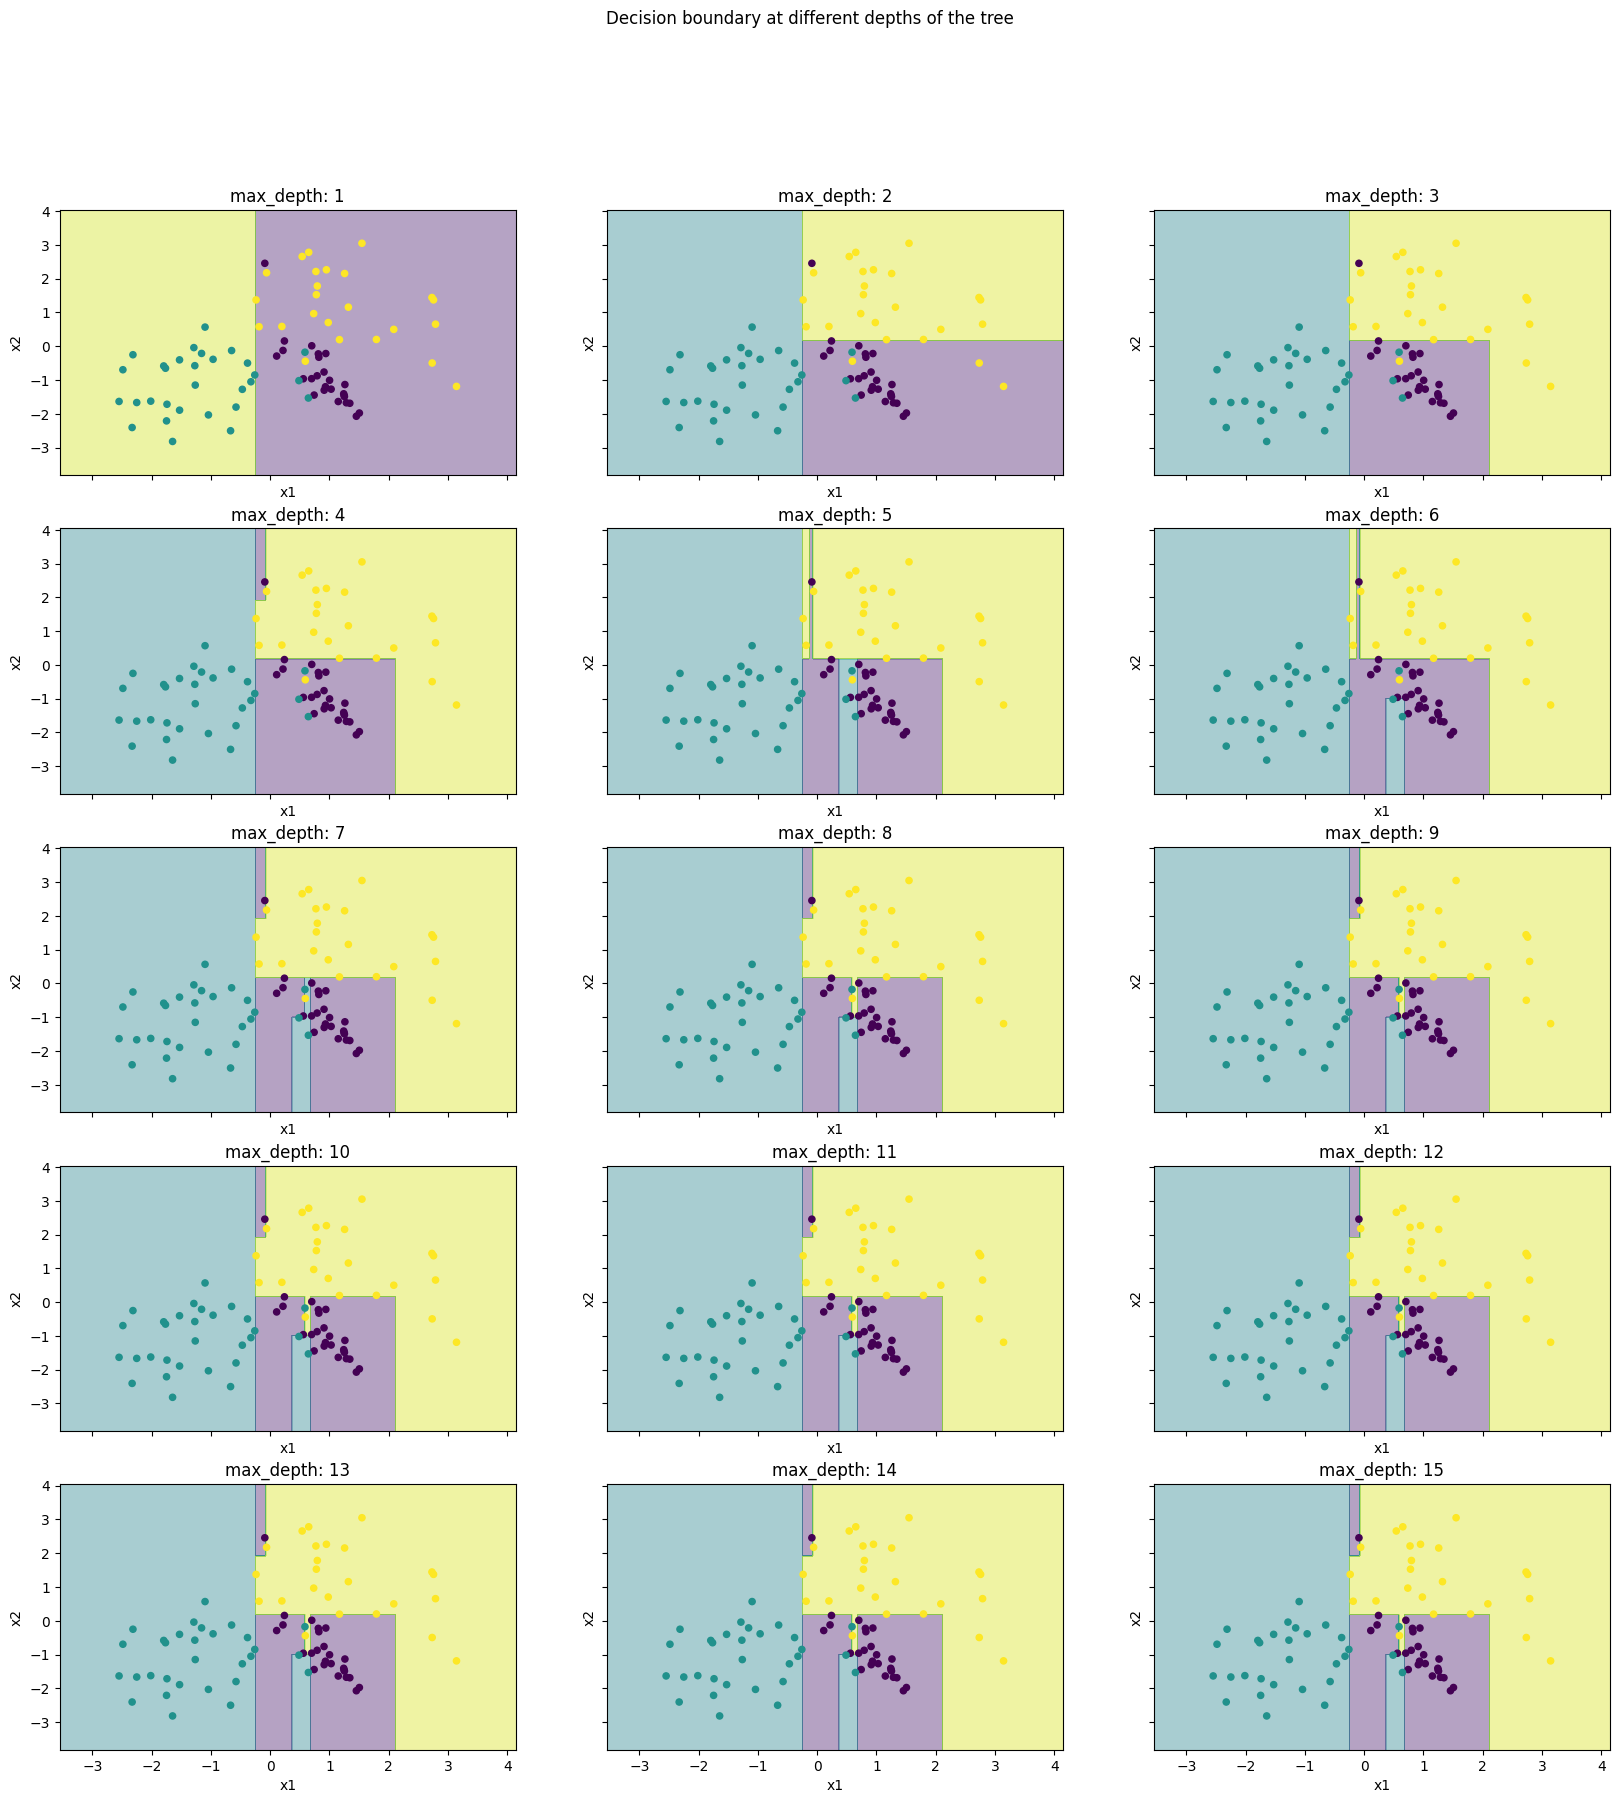

In [4]:
def plot_decision_boundary(clf, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                      np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20)
    ax.set_xlabel("x1")
    ax.set_ylabel('x2')
    ax.set_title("max_depth: {}".format(clf.max_depth))

fig, ax = plt.subplots(int(np.ceil((depth)/3)), 3, sharex = True, sharey = True, figsize = (20,20))
fig.suptitle("Decision boundary at different depths of the tree")
ax = ax.flatten()
ax = list(ax)
for clf, axx  in zip(clfs, ax):
    plot_decision_boundary(clf, X_train, y_train, axx)

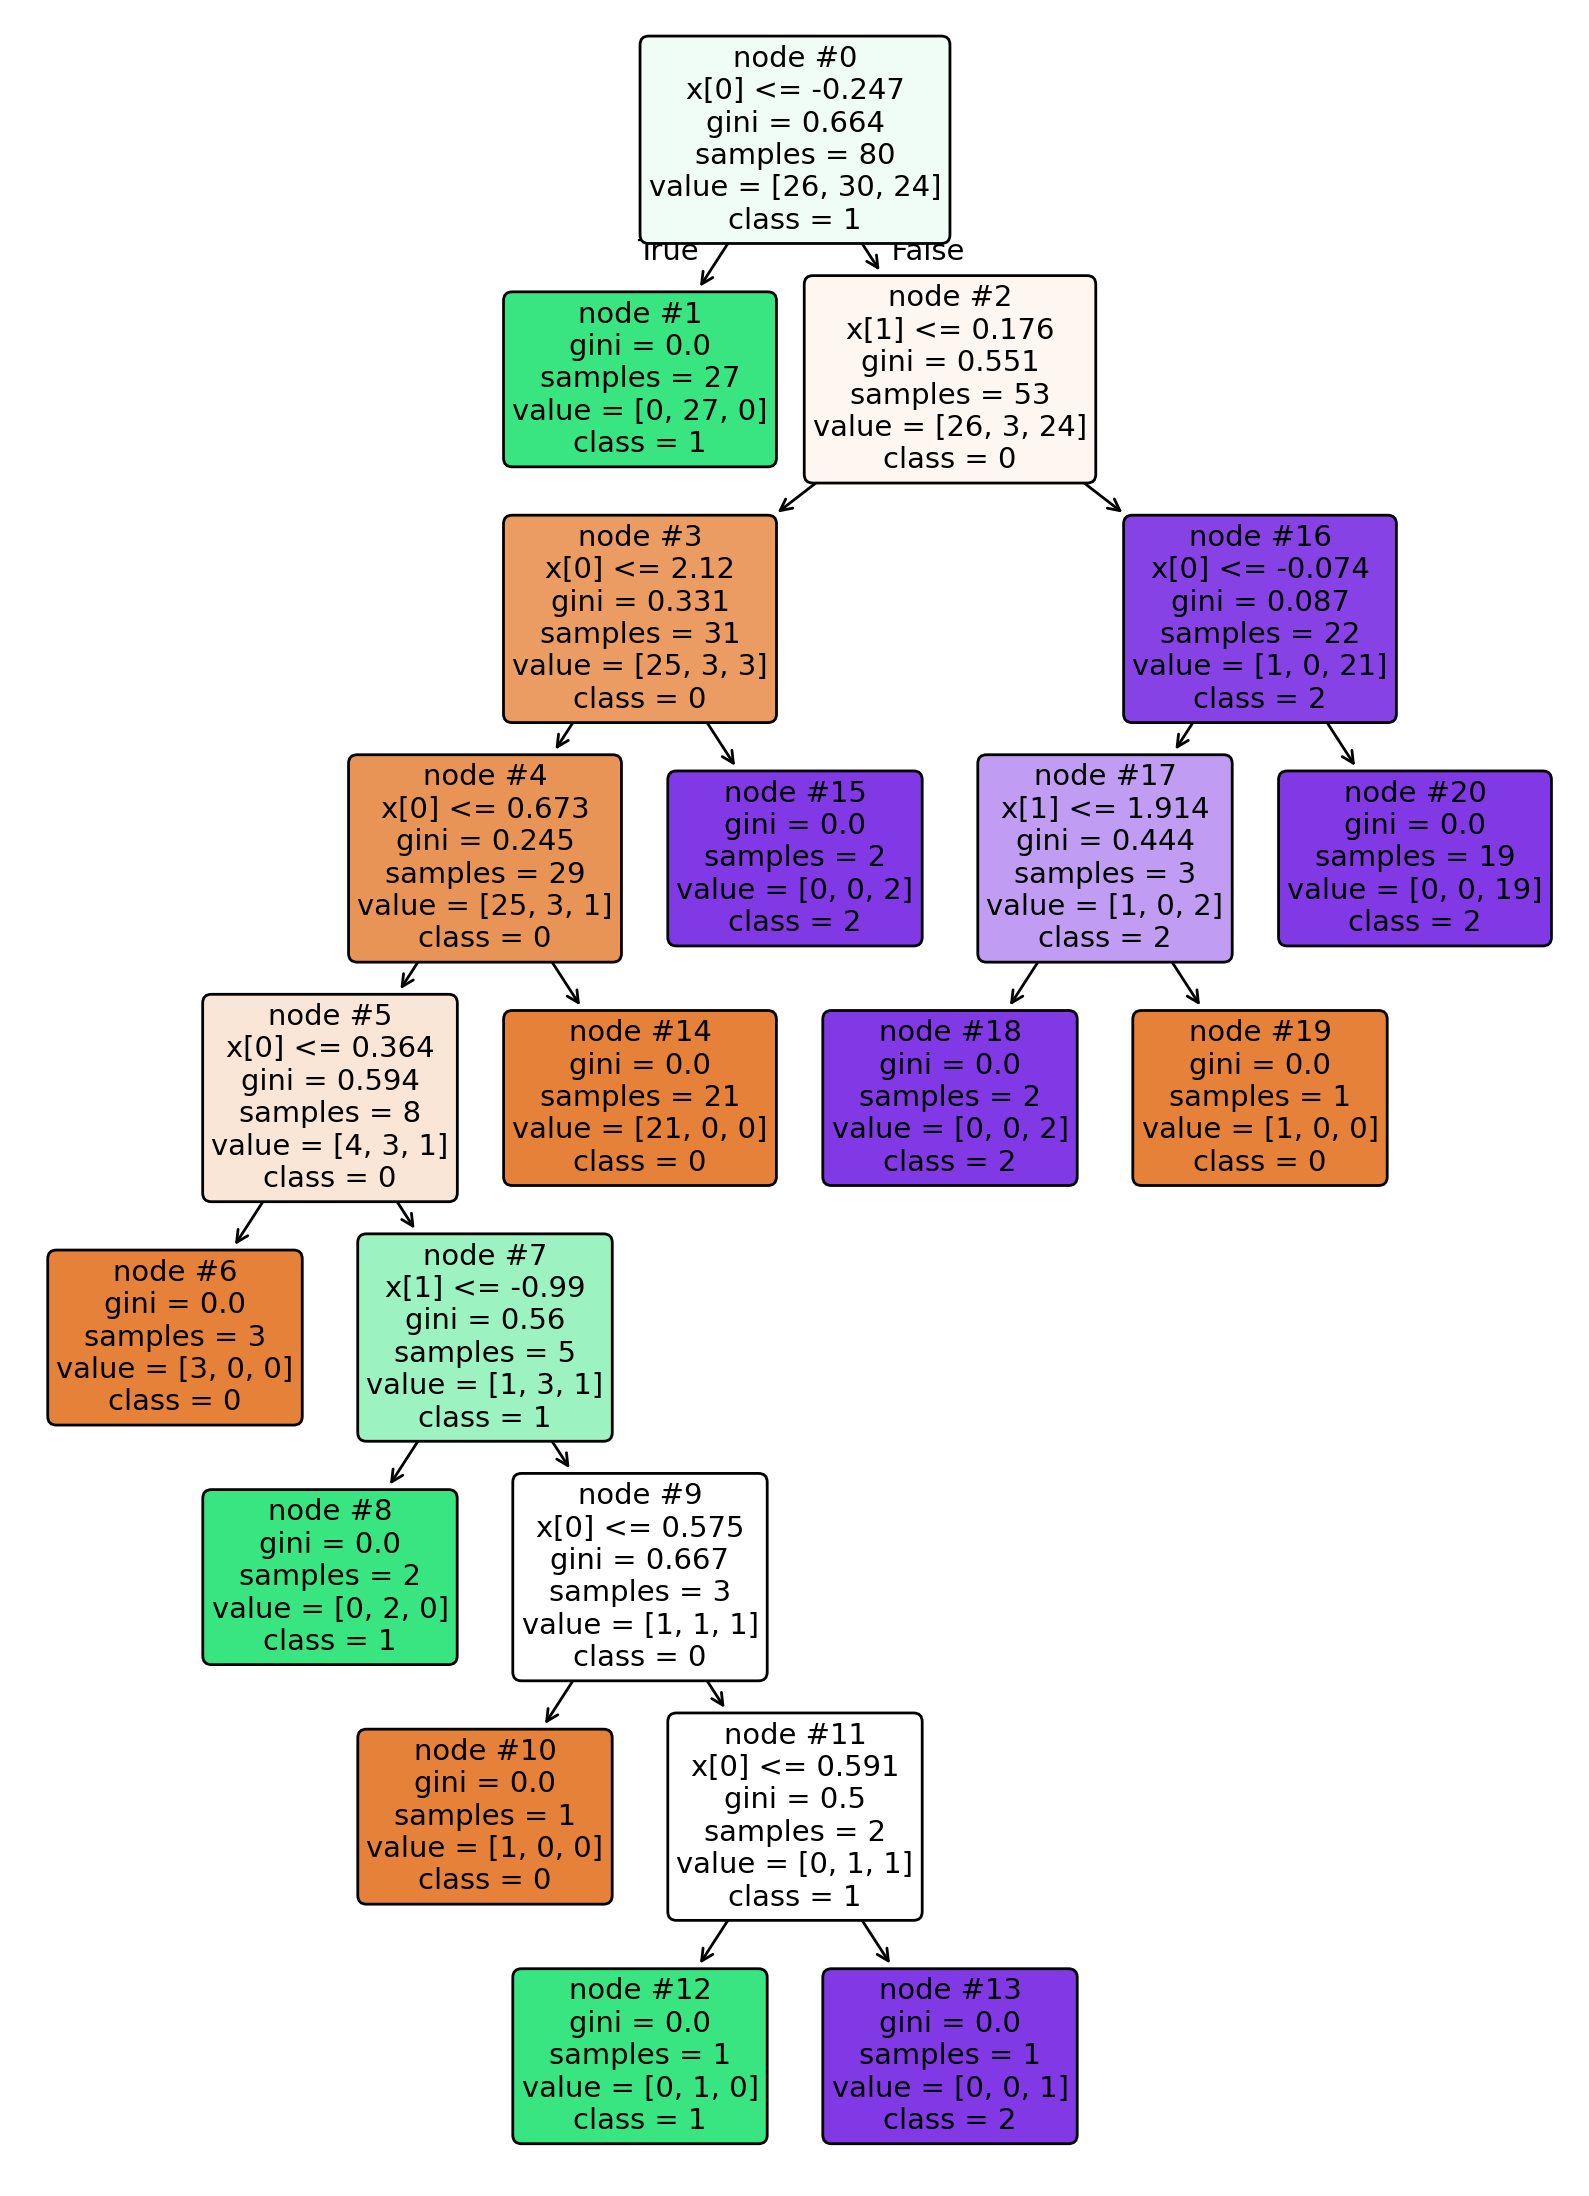

Training Accuracy: 1.0
Test Accuracy 0.75


In [6]:
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

clf1 = DecisionTreeClassifier(random_state = 12)   # Every time we will set random_state to 12
clf1.fit(X_train, y_train)  

# Plot the tree structure
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,14), dpi=200)
plot_tree(clf1, feature_names=X_train.columns if hasattr(X_train, "columns") else None, 
          class_names=[str(cls) for cls in clf1.classes_],
          filled=True, node_ids=True, rounded=True)
plt.show()

print("Training Accuracy:", accuracy_score(y_train, clf1.predict(X_train)))
print("Test Accuracy",accuracy_score(y_test, clf1.predict(X_test)))